In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("Breast_Cancer.csv")

In [90]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [91]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [96]:
df.isna().sum()


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [41]:
df.columns = df.columns.str.lower().str.strip(' ').str.replace(' ', '_')


In [97]:
df.duplicated().sum()


1

In [98]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0
Tumor Size,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4023.0,14.358439,8.100241,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4023.0,4.158837,5.109724,1.0,1.0,2.0,5.0,46.0
Survival Months,4023.0,71.301765,22.923009,1.0,56.0,73.0,90.0,107.0


In [100]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Reginol Node Positive   4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [101]:
df["Status"] = df["Status"].replace(["Alive", "Dead"], [1, 0])
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1


In [102]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [107]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['race',
 'marital_status',
 't_stage_',
 'n_stage',
 '6th_stage',
 'differentiate',
 'grade',
 'a_stage',
 'estrogen_status',
 'progesterone_status']

In [108]:
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [110]:
df.head()

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,white,married,t1,n1,iia,poorly_differentiated,3,regional,4,positive,positive,24,1,60,1
1,50,white,married,t2,n2,iiia,moderately_differentiated,2,regional,35,positive,positive,14,5,62,1
2,58,white,divorced,t3,n3,iiic,moderately_differentiated,2,regional,63,positive,positive,14,7,75,1
3,58,white,married,t1,n1,iia,poorly_differentiated,3,regional,18,positive,positive,2,1,84,1
4,47,white,married,t2,n1,iib,poorly_differentiated,3,regional,41,positive,positive,3,1,50,1


In [111]:
from sklearn.model_selection import train_test_split


In [112]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [231]:
len(df_train), len(df_val), len(df_test)


(2413, 805, 805)

In [232]:

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [115]:
y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

del df_train['status']
del df_val['status']
del df_test['status']

In [116]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes == 'int'].index)
numerical.remove("status")


In [117]:
from sklearn.feature_extraction import DictVectorizer


In [118]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [119]:
from sklearn.linear_model import LogisticRegression


In [120]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/Users/swordfish/opt/miniconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')


In [122]:
X_test = dv.transform(dicts_test)


In [123]:
y_pred = model.predict_proba(X_test)[:, 1]


In [124]:
status_decision = (y_pred >= 0.5)


In [125]:
(status_decision == y_test).mean()


0.8944099378881988

In [126]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

# Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [128]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [130]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7018092951466302

In [131]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [132]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [133]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8222907795826105
val: 0.8184334958473185


In [134]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- survival_months <= 47.50
|   |--- age <= 61.50
|   |   |--- class: 0
|   |--- age >  61.50
|   |   |--- class: 0
|--- survival_months >  47.50
|   |--- survival_months <= 67.50
|   |   |--- class: 1
|   |--- survival_months >  67.50
|   |   |--- class: 1



# Parameter Tuning Decision Tree

In [135]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.770
   2 -> 0.818
   3 -> 0.830
   4 -> 0.852
   5 -> 0.834
   6 -> 0.800
  10 -> 0.718
  15 -> 0.697
  20 -> 0.708
None -> 0.701


In [136]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [137]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [138]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.852  0.834  0.800
5                 0.851  0.850  0.828
10                0.851  0.849  0.827
15                0.851  0.850  0.828
20                0.854  0.845  0.833
100               0.836  0.824  0.822
200               0.838  0.838  0.838
500               0.793  0.793  0.793

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

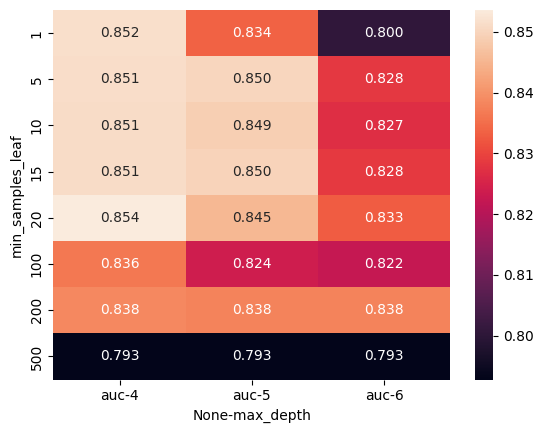

In [139]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [142]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])


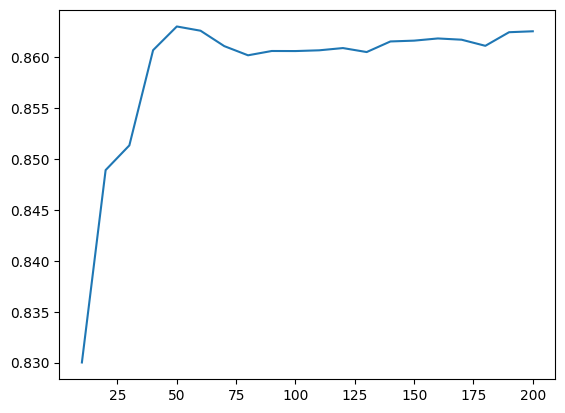

In [143]:
plt.plot(df_scores.n_estimators, df_scores.auc)


In [144]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [145]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

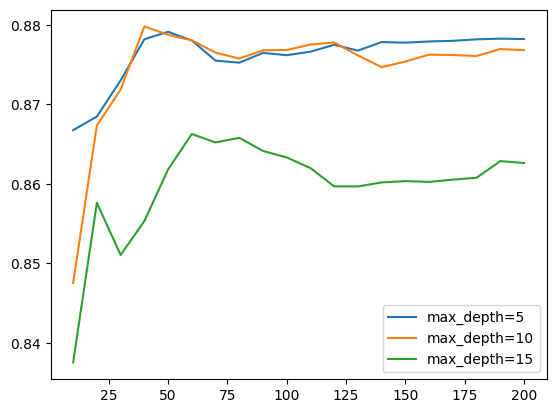

In [146]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()


In [147]:
max_depth = 10


In [148]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [149]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

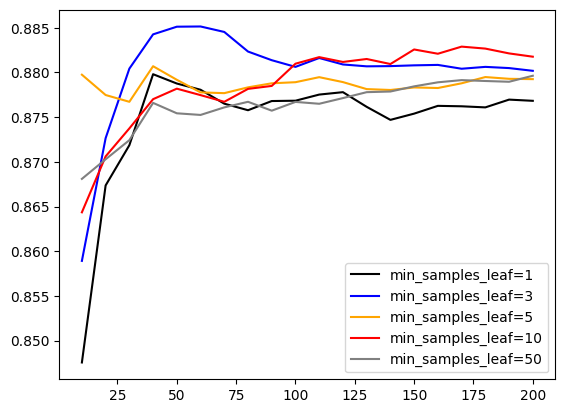

In [150]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [151]:
min_samples_leaf = 3


In [153]:
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=1)

In [154]:
import xgboost as xgb


In [155]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [156]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [157]:
y_pred = model.predict(dval)


In [158]:
roc_auc_score(y_val, y_pred)

0.8473797682338242

In [159]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [160]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [161]:
s = output.stdout


In [162]:
print(s[:200])


[0]	train-auc:0.86465	val-auc:0.83081
[5]	train-auc:0.93394	val-auc:0.84558
[10]	train-auc:0.96471	val-auc:0.84807
[15]	train-auc:0.97720	val-auc:0.84867
[20]	train-auc:0.98475	val-auc:0.85112
[25]	tr


In [163]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [164]:
df_score = parse_xgb_output(output)


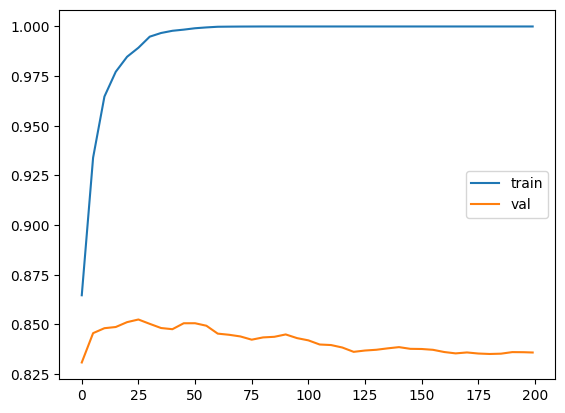

In [165]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

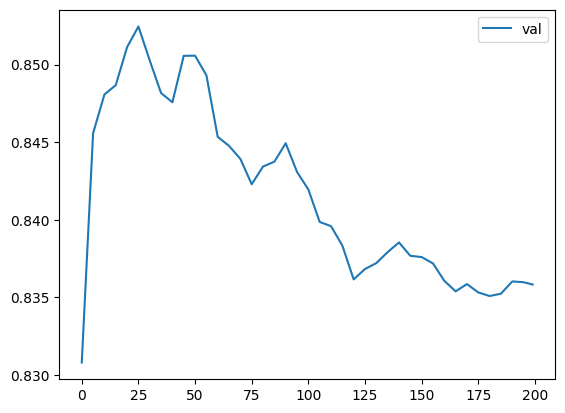

In [166]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [167]:
scores = {}


In [181]:
%%capture output

xgb_params = {
    'eta': 0.9, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [182]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.9'

In [183]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.9'])

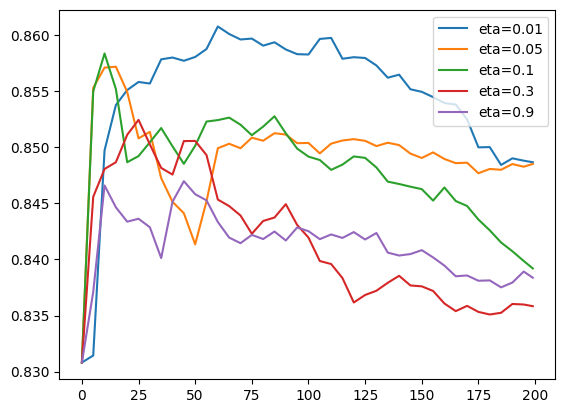

In [184]:
for key, df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.legend()

In [185]:
scores = {}


In [195]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [196]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [197]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

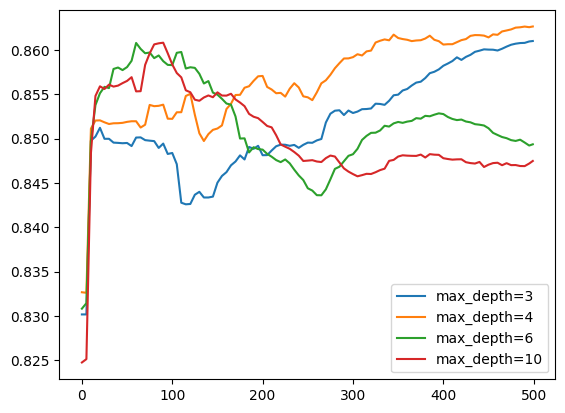

In [198]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

# plt.ylim(0.88, 0.92)
plt.legend()

In [202]:
scores = {}


In [209]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 4,
    'min_child_weight': 13,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [210]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=13'

In [211]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=13'])

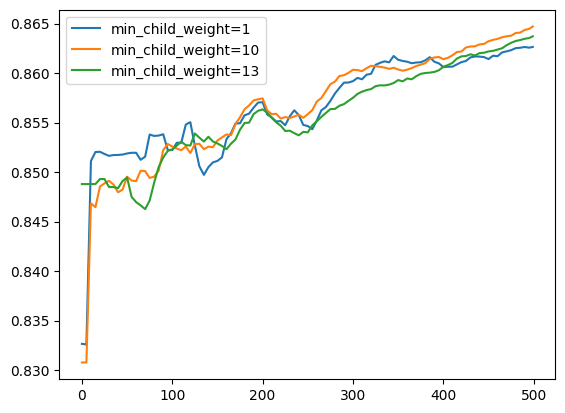

In [212]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

# plt.ylim(0.82, 0.84)
plt.legend()

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)